In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🧠 **Need vs. Care: A Comparative Study on Mental Health Services**

---
## 📋 **Project Overview**
This project analyzes mental health service utilization and unmet needs across various U.S. subpopulations during the last 4 weeks, based on the **Household Pulse Survey** by the **U.S. Census Bureau**.

## 🧹 Data Cleaning and Preprocessing

In this step, we prepare the dataset for analysis by performing the following tasks:

- 📁 **Load the dataset** from a CSV file.
- ✨ **Standardize column names** to lowercase with underscores for consistency and easier access.
- 🔁 **Remove duplicate rows** to ensure data accuracy (optional but useful).
- ⚠️ **Handle missing values** by removing rows that are missing key information like `subgroup`, `group`, or `value`.

In [3]:
# Load your dataset
df = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks (1).csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop duplicates (optional, if necessary)
df.drop_duplicates(inplace=True)

# Handle missing values (optional strategy)
df.dropna(subset=['subgroup', 'group', 'value'], inplace=True) 


## 🎯 Objective: Group-Based Analysis

The goal of this step is to uncover insights into mental health care usage across different demographic groups:

- 🧑‍🤝‍🧑 **By Age**: Analyze mental health care usage across different age groups.
- 🚻 **By Sex**: Compare mental health care usage between genders.
- 😟 **By Symptoms**: Investigate usage based on the presence of anxiety or depression symptoms.
- 🌎 **By Race/Ethnicity**: Explore racial or ethnic differences in mental health care usage.
- 🎓 **By Education**: Examine how education level influences mental health care usage.
- 🌍 **By State**: Assess regional differences in mental health care access and usage.

By splitting the data into these groups, we can better understand patterns and identify trends specific to each demographic.


In [4]:
# Optional: Normalize whitespace and case just to be safe
df['group'] = df['group'].str.strip()
df['time_period_start_date'] = pd.to_datetime(df['time_period_start_date'])
# Separate subgroups correctly
age_df = df[df['group'] == 'By Age']
sex_df = df[df['group'] == 'By Sex']
symptom_df = df[df['group'] == 'By Presence of Symptoms of Anxiety/Depression']
race_df = df[df['group'] == 'By Race/Hispanic ethnicity']
education_df = df[df['group'] == 'By Education']
state_df = df[df['group'] == 'By State']

## 🎯 Objective: Visualize Medication Usage by Age Group

In this step, we aim to visualize the variation in mental health medication usage across different age groups. The line plot below will help us gain the following insights:

- 📊 **Age-Based Medication Usage**: This line plot shows how the percentage of individuals who took prescription medication for mental health changes across different age groups in the last 4 weeks.
- 📅 **Trend Visualization**: The plot helps us identify trends, highlighting which age groups have higher or lower medication usage.
- 🔍 **Comparative Analysis**: We can directly compare medication usage percentages across different age subgroups to identify patterns and differences.

This visualization helps us easily interpret the impact of age on mental health medication usage during the pandemic.


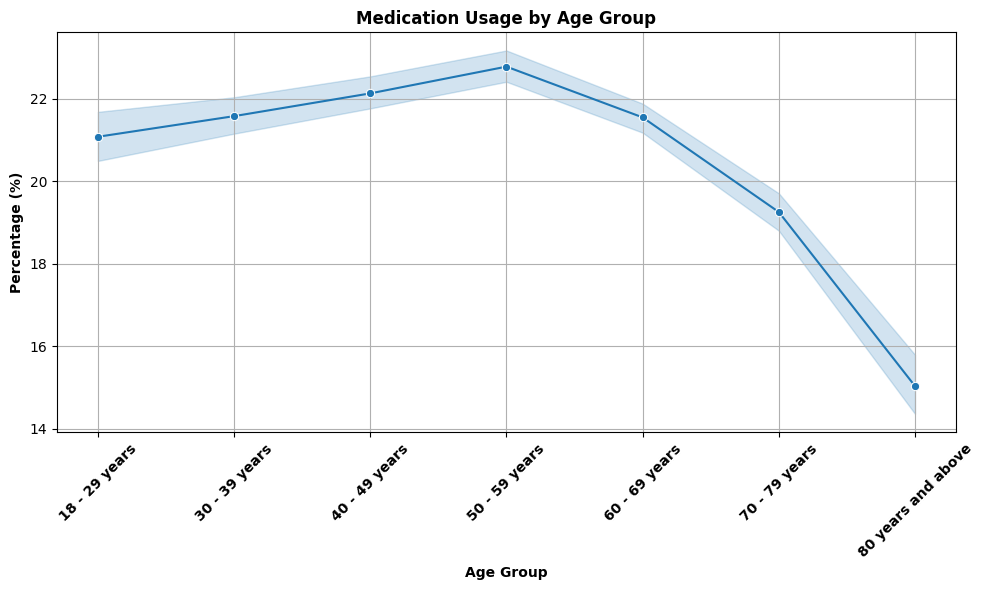

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_df[age_df['indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks'],
             x='subgroup', y='value', marker='o')
plt.title('Medication Usage by Age Group',weight="bold")
plt.ylabel('Percentage (%)',weight="bold")
plt.xlabel('Age Group',weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.tight_layout()
plt.grid(True)
plt.show()


## 🎯 Objective: Visualize Medication Usage by Sex

In this step, we aim to visualize the variation in mental health medication usage between males and females. The bar plot below provides the following insights:

- 📊 **Sex-Based Medication Usage**: The bar plot shows the percentage of individuals who took prescription medication for mental health, separated by sex (male and female).
- 🔍 **Comparison of Usage**: This plot helps us compare the medication usage percentage between males and females, highlighting any gender disparities in mental health care access during the pandemic.
- 📉 **Trend Analysis**: We can easily identify if one sex category has a significantly higher or lower percentage of medication usage compared to the other.

This visualization provides valuable insights into gender-based differences in mental health care usage.


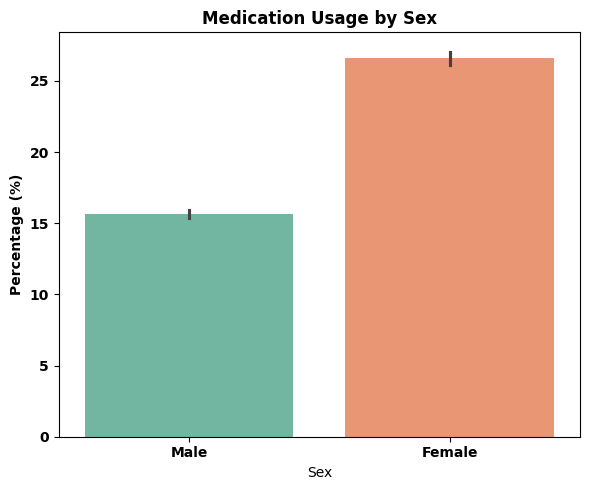

In [14]:
plt.figure(figsize=(6, 5))
sns.barplot(data=sex_df[sex_df['indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks'],
            x='subgroup', y='value',hue="subgroup", palette='Set2')
plt.title('Medication Usage by Sex',weight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.ylabel('Percentage (%)' ,weight="bold")
plt.xlabel('Sex')
plt.tight_layout()
plt.show()


## 🎯 Objective: Visualize Medication Usage by Mental Health Status

In this step, we aim to visualize how mental health medication usage varies based on the presence of anxiety or depression symptoms. The bar plot below provides the following insights:

- 📊 **Medication Usage by Mental Health Status**: The plot shows the percentage of individuals who took prescription medication for mental health, grouped by their mental health status (presence of symptoms).
- 🔍 **Comparison of Symptoms**: This bar plot helps us compare the usage of mental health medication between those with symptoms of anxiety or depression and those without.
- 📉 **Symptom Impact**: By analyzing this data, we can identify how symptoms of anxiety or depression influence the likelihood of individuals seeking prescription medication.

This visualization helps us better understand the relationship between mental health status and medication usage during the pandemic.


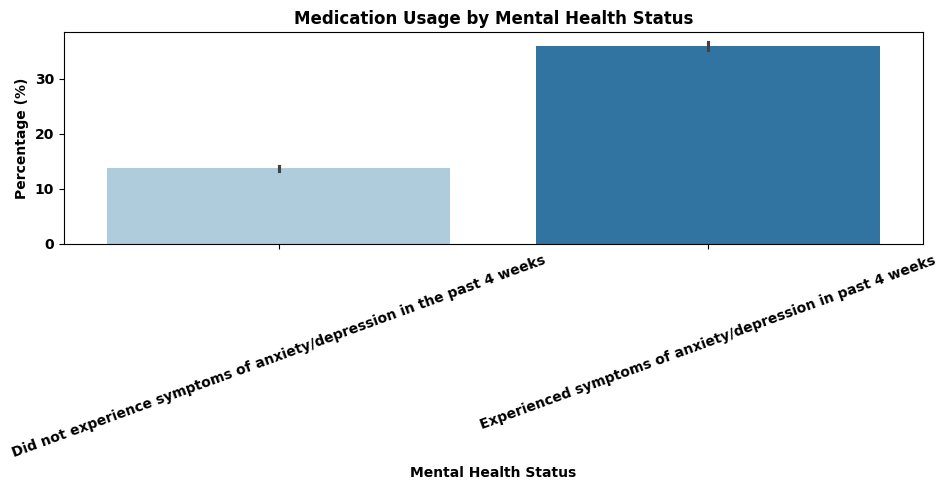

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(data=symptom_df[symptom_df['indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks'],
            x='subgroup', y='value',hue="subgroup", palette='Paired')
plt.title('Medication Usage by Mental Health Status',weight="bold")
plt.xticks(rotation=20,weight="bold")
plt.yticks(weight="bold")
plt.ylabel('Percentage (%)',weight="bold")
plt.xlabel('Mental Health Status',weight="bold")
plt.tight_layout()
plt.show()


## 🎯 Objective: Visualize Medication Usage by Race/Ethnicity

In this step, we aim to visualize how mental health medication usage varies across different racial and ethnic groups. The bar plot below provides the following insights:

- 📊 **Medication Usage by Race/Ethnicity**: The plot shows the percentage of individuals who took prescription medication for mental health, grouped by race/ethnicity.
- 🔍 **Comparison Across Groups**: This bar plot helps us compare the usage of mental health medication between different racial or ethnic groups, highlighting any disparities.
- 📉 **Racial/Ethnic Impact**: By analyzing this data, we can identify whether certain racial or ethnic groups are more or less likely to use prescription medication for mental health.

This visualization helps us understand the influence of race and ethnicity on medication usage for mental health during the pandemic.


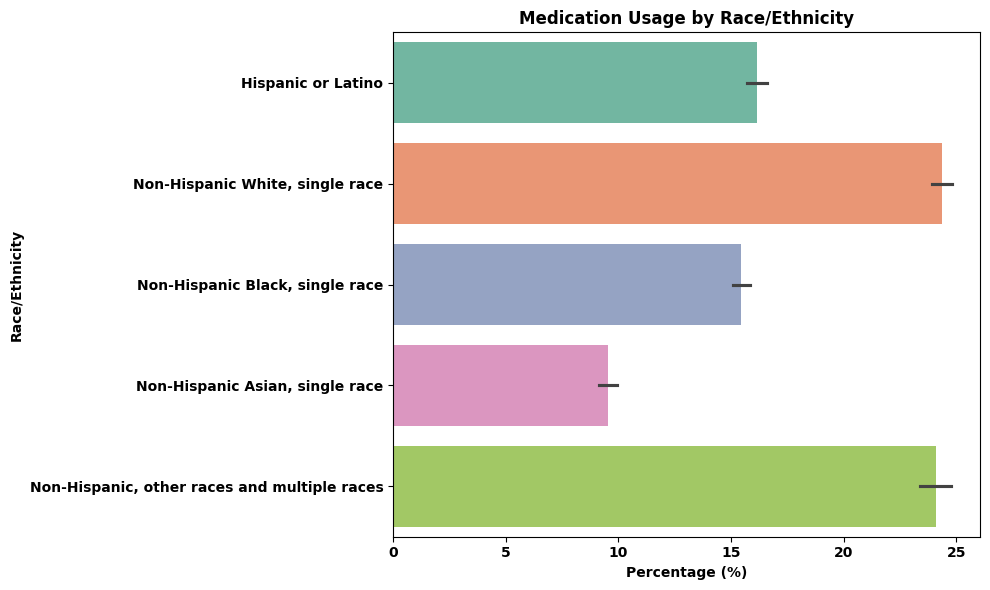

In [27]:
race_data = race_df[race_df['indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']

plt.figure(figsize=(10, 6))
sns.barplot(data=race_data,y='subgroup',x='value',hue='subgroup',palette='Set2',)
plt.title('Medication Usage by Race/Ethnicity', weight='bold')
plt.xlabel('Percentage (%)', weight='bold')
plt.ylabel('Race/Ethnicity', weight='bold')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
plt.tight_layout()
plt.show()


## 🎯 Objective: Visualize Medication Usage by Education Level

In this step, we aim to visualize how mental health medication usage varies across different education levels. The bar plot below provides the following insights:

- 📊 **Medication Usage by Education Level**: The plot shows the percentage of individuals who took prescription medication for mental health, grouped by education level.
- 🔍 **Comparison Across Education Levels**: This bar plot helps us compare the usage of mental health medication between individuals with different levels of education, revealing any trends or disparities.
- 📉 **Impact of Education**: By analyzing this data, we can identify if education level affects the likelihood of individuals using prescription medication for mental health.

This visualization helps us understand the role of education in shaping mental health medication usage during the pandemic.


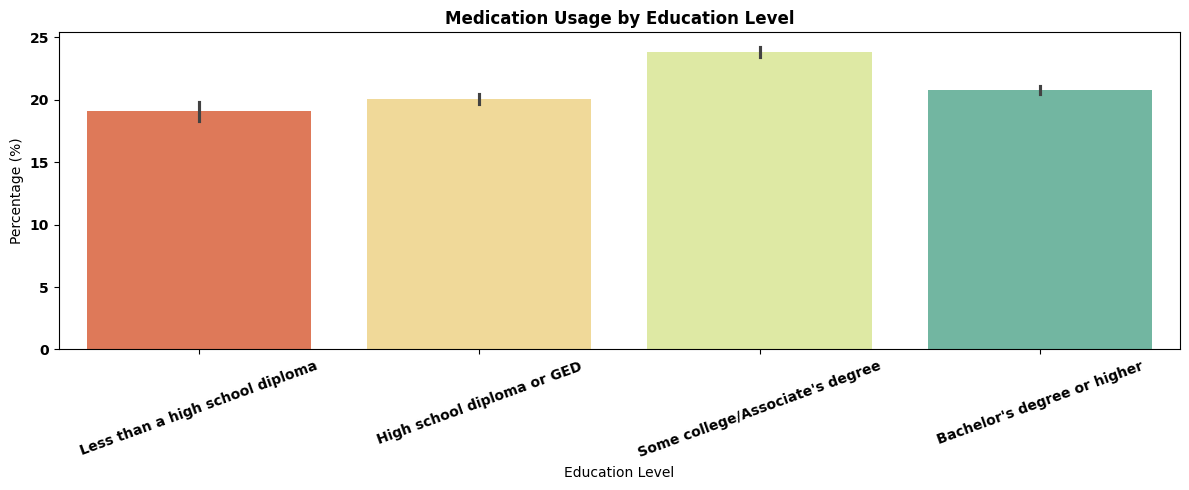

In [32]:
plt.figure(figsize=(12, 5))
sns.barplot(data=education_df[education_df['indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks'],
            x='subgroup', y='value',hue='subgroup',palette='Spectral')
plt.title('Medication Usage by Education Level',weight="bold")
plt.xticks(rotation=20,weight="bold")
plt.yticks(weight="bold")
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


## 🎯 Objective: Visualize Unmet Need vs. Received Mental Health Care in Top 10 States

In this step, we aim to visualize the top 10 states with the highest unmet need for mental health counseling or therapy compared to the percentage of individuals who received care. The following insights are drawn from the bar plot:

- 📊 **Unmet Need vs. Received Care**: The plot compares the percentage of individuals who needed but did not receive counseling or therapy with the percentage who actually received mental health care in the top 10 states.
- 🔍 **State-Level Disparities**: The bar plot highlights the disparities in mental health care access across states, helping us identify the states with the greatest need for mental health services.
- 📉 **Regional Gaps in Care**: This analysis draws attention to the top 10 states with the highest unmet need, helping to focus efforts on addressing mental health care gaps in these areas.

This visualization helps identify states that may need increased resources to bridge the gap between the need for and the access to mental health care during the pandemic.


In [47]:
# Filter the dataframe
needed = df[df['indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
received = df[df['indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']

# Average values per state
need_by_state = needed.groupby('state')['value'].mean()
received_by_state = received.groupby('state')['value'].mean()

# Combine into one DataFrame
compare_df = pd.DataFrame({
    'Unmet Need (%)': need_by_state,
    'Received Care (%)': received_by_state
})


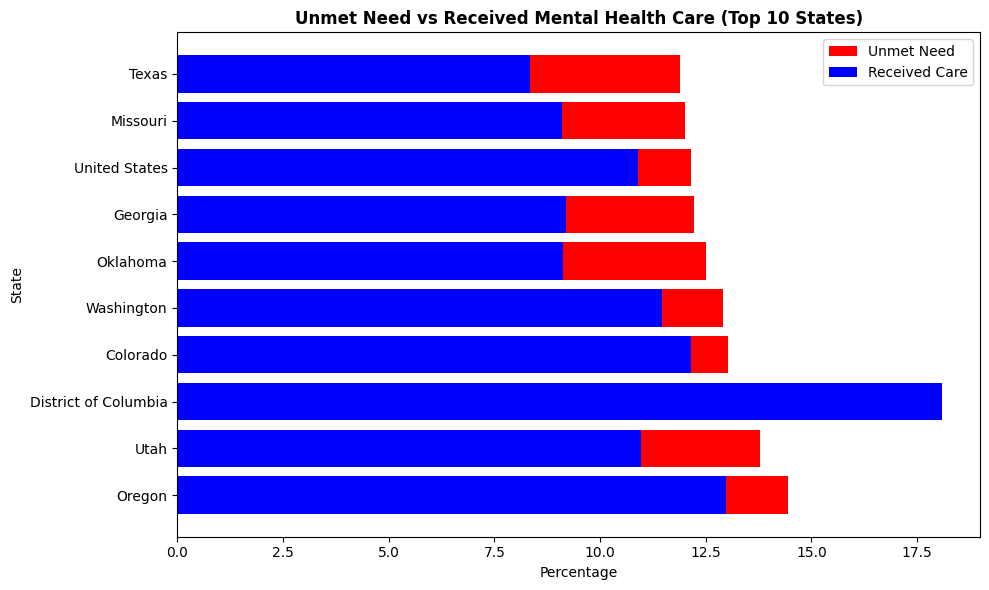

In [66]:
compare_df = compare_df.sort_values(by='Unmet Need (%)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(compare_df.index, compare_df['Unmet Need (%)'], color='red', label='Unmet Need')
plt.barh(compare_df.index, compare_df['Received Care (%)'], color='blue', label='Received Care')
plt.title('Unmet Need vs Received Mental Health Care (Top 10 States)', weight='bold')
plt.xlabel('Percentage')
plt.ylabel('State')
plt.legend()
plt.tight_layout()
plt.show()


#  🧠 Improving Mental Health Treatment: Top Recommendations

## 👵 Age-Based Interventions
Higher medication use among 50-59 year-olds (~23%) and lower among 80+ (15%) underscores the requirement for age-stratified interventions. Targeting older adults and targeting early intervention among younger adults (18-29) to treat mental health.

## 🎓 Education-Based Access
Use of drugs is greatest in those with some college (~24%). Interventions to explicitly address mental health literacy and to reduce barriers for those with lesser levels of schooling are paramount.

## 💊 Symptom-Response Improvements
Usage of medication is much more prevalent in symptomatic patients (32%) than in non-symptomatic patients (13%). Early intervention and routine screening for mental illness can avoid conditions from turning into something severe.

## 🌍 Cultural Competency
Racial/ethnic variation in medication use (10% among Asian Americans, 25-26% among White and multiracial) requires culturally sensitive care and diversity of the workforce in mental health treatment.

## 🚻 Gender-Informed Care

10% difference in use of medication by women (26%) and men (16%) is indicative of gender-specific treatment. Proper care must be identified to improve drug use among women and outreach must be developed for men.

## 🏥 Allocation by Region

Disparities at the state level point to the importance of targeted resources in under-resourced populations. Telehealth expansion and incentivizing workforce development within these populations are critical. ## ???? Integration and Access Integration of mental health treatment into primary care environments with standardized screening and increased insurance coverage can improve access and treatment for all. By implementing these guidelines, health systems can advance equity and the quality of mental health care to all sectors.